 Software Defects Classification

In [150]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import os.path


file_path ='/home/akurdi/Desktop/SDP/datasetcsv'

print ('is folder found')
print (os.path.exists(file_path))

orinigal_dataset_path=''
for dirname, _, filenames in os.walk(file_path):
    print(dirname)
    for filename in filenames:
        print(os.path.join(dirname, filename))
        if filename == 'tomcat.csv' :
            orinigal_dataset_path=os.path.join(dirname, filename)
        

is folder found
True
/home/akurdi/Desktop/SDP/datasetcsv
/home/akurdi/Desktop/SDP/datasetcsv/SOFTLAB
/home/akurdi/Desktop/SDP/datasetcsv/SOFTLAB/ar3.csv
/home/akurdi/Desktop/SDP/datasetcsv/SOFTLAB/ar5.csv
/home/akurdi/Desktop/SDP/datasetcsv/SOFTLAB/ar1.csv
/home/akurdi/Desktop/SDP/datasetcsv/SOFTLAB/ar4.csv
/home/akurdi/Desktop/SDP/datasetcsv/SOFTLAB/.DS_Store
/home/akurdi/Desktop/SDP/datasetcsv/SOFTLAB/ar6.csv
/home/akurdi/Desktop/SDP/datasetcsv/MORPH
/home/akurdi/Desktop/SDP/datasetcsv/MORPH/xalan-2.4.csv
/home/akurdi/Desktop/SDP/datasetcsv/MORPH/poi-1.5.csv
/home/akurdi/Desktop/SDP/datasetcsv/MORPH/ant-1.3.csv
/home/akurdi/Desktop/SDP/datasetcsv/MORPH/velocity-1.4.csv
/home/akurdi/Desktop/SDP/datasetcsv/MORPH/redktor.csv
/home/akurdi/Desktop/SDP/datasetcsv/MORPH/camel-1.0.csv
/home/akurdi/Desktop/SDP/datasetcsv/MORPH/.DS_Store
/home/akurdi/Desktop/SDP/datasetcsv/MORPH/arc.csv
/home/akurdi/Desktop/SDP/datasetcsv/MORPH/xerces-1.2.csv
/home/akurdi/Desktop/SDP/datasetcsv/MORPH/tomcat.cs

In [128]:
orig_df = pd.read_csv(orinigal_dataset_path)
print(orig_df.shape)
orig_df.head(20)

(1862, 62)


,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,LDHH_numberOfPrivateAttributes,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
0,1,0.019228,0.024845,4,0.00,1.01,0.002216,0.018552,1.02,0.017874,...,0.000000,0.002801,0.020688,36,6,0.023730,1.15,0.116244,0.019133,clean
1,0,0.000000,0.000000,20,0.00,0.00,0.278898,0.000000,0.00,0.000000,...,0.013098,0.009791,0.006229,9,1,0.014303,3.13,0.254718,0.000000,buggy
2,1,0.000000,0.000000,0,0.00,0.00,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,9,1,0.000000,0.00,0.000000,0.000000,buggy
3,0,0.000734,0.056522,6,0.00,1.01,0.013173,0.001171,8.10,0.001505,...,0.000000,0.009791,0.000900,18,14,0.055485,3.10,0.347682,0.001253,clean
4,0,0.000000,0.010560,5,0.00,0.00,0.042989,0.000000,5.11,0.000000,...,0.022584,0.016354,0.002214,31,12,0.032393,2.04,0.262198,0.000000,clean
5,0,0.000000,0.000000,2,0.00,0.00,0.003364,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0,3,0.000000,0.00,0.184572,0.000000,clean
6,0,0.000000,0.000000,4,0.00,1.01,0.013012,0.000000,0.00,0.045459,...,0.074547,0.009791,0.064264,17,1,0.085528,4.11,0.413225,0.000000,clean
7,0,0.000000,0.006820,0,0.00,0.00,0.000000,0.000000,2.02,0.000000,...,0.000000,0.009791,0.000000,32,3,0.007283,1.01,0.000000,0.000000,clean
8,1,0.000000,0.000000,5,0.00,1.01,0.008067,0.000000,0.00,0.000000,...,0.000000,0.000000,0.001143,0,2,0.000000,2.02,0.322628,0.000000,clean
9,0,0.000000,0.000000,2,0.00,0.00,0.012142,0.000000,0.00,0.000000,...,0.007324,0.012592,0.003942,0,4,0.006864,0.00,0.000913,0.000000,clean


In [129]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['missing#'] = df.isna().sum().values*100
    summ['missing%'] = (df.isna().sum().values*100)/len(df)
    summ['uniques'] = df.nunique().values
    summ['count'] = df.count().values
    desc = pd.DataFrame(df.describe().T)
    summ['min'] = desc['min']
    summ['max'] = desc['max']
    summ['mean'] = desc['mean']
    return summ

summary(orig_df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count,min,max,mean
ck_oo_numberOfPrivateMethods,int64,0,0.000000,22,1862,0.000000,24.000000,1.016649
LDHH_lcom,float64,0,0.000000,227,1862,0.000000,0.084635,0.002510
LDHH_fanIn,float64,0,0.000000,332,1862,0.000000,0.239695,0.007198
numberOfNonTrivialBugsFoundUntil:,int64,0,0.000000,43,1862,0.000000,92.000000,3.655209
WCHU_numberOfPublicAttributes,float64,0,0.000000,16,1862,0.000000,4.280000,0.037997
WCHU_numberOfAttributes,float64,0,0.000000,72,1862,0.000000,18.270000,0.469737
CvsWEntropy,float64,0,0.000000,1176,1862,0.000000,1.907710,0.027583
LDHH_numberOfPublicMethods,float64,0,0.000000,171,1862,0.000000,0.071222,0.001983
WCHU_fanIn,float64,0,0.000000,105,1862,0.000000,38.270000,1.007095
LDHH_numberOfPrivateAttributes,float64,0,0.000000,175,1862,0.000000,0.083027,0.002093


# Assuming 'orig_df' is your dataframe and 'defects' contains True/False values

In [135]:
import pandas as pd

orig_df.replace( '?', 0, inplace=True)

# Assuming 'orig_df' is your dataframe and 'defects' contains True/False values
# orig_df['class'] = orig_df['class'].astype(int)
orig_df['class'] = orig_df['class'].replace({'clean': 0, 'buggy': 1}).astype(int)

# Assuming 'orig_df' is your dataset and it has features and a target column
X = orig_df.drop('class', axis=1)  # Features (drop the target column)
y = orig_df['class']               # Target column

print(orig_df[X.columns].apply(pd.to_numeric, errors='coerce').isnull().sum())

ck_oo_numberOfPrivateMethods         0
LDHH_lcom                            0
LDHH_fanIn                           0
numberOfNonTrivialBugsFoundUntil:    0
WCHU_numberOfPublicAttributes        0
                                    ..
ck_oo_numberOfPublicMethods          0
LDHH_cbo                             0
WCHU_numberOfLinesOfCode             0
CvsExpEntropy                        0
LDHH_numberOfMethods                 0
Length: 61, dtype: int64


In [136]:
summary(orig_df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count,min,max,mean
ck_oo_numberOfPrivateMethods,int64,0,0.000000,22,1862,0.000000,24.000000,1.016649
LDHH_lcom,float64,0,0.000000,227,1862,0.000000,0.084635,0.002510
LDHH_fanIn,float64,0,0.000000,332,1862,0.000000,0.239695,0.007198
numberOfNonTrivialBugsFoundUntil:,int64,0,0.000000,43,1862,0.000000,92.000000,3.655209
WCHU_numberOfPublicAttributes,float64,0,0.000000,16,1862,0.000000,4.280000,0.037997
WCHU_numberOfAttributes,float64,0,0.000000,72,1862,0.000000,18.270000,0.469737
CvsWEntropy,float64,0,0.000000,1176,1862,0.000000,1.907710,0.027583
LDHH_numberOfPublicMethods,float64,0,0.000000,171,1862,0.000000,0.071222,0.001983
WCHU_fanIn,float64,0,0.000000,105,1862,0.000000,38.270000,1.007095
LDHH_numberOfPrivateAttributes,float64,0,0.000000,175,1862,0.000000,0.083027,0.002093


# Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

In [137]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = orig_df.drop('class', axis=1)  # Features (drop the target column)
y = orig_df['class']               # Target column

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,ck_oo_numberOfPrivateMethods,706.497703
1,LDHH_lcom,2.176541
2,LDHH_fanIn,1.474207
3,numberOfNonTrivialBugsFoundUntil:,1035.701846
4,WCHU_numberOfPublicAttributes,26.623416
...,...,...
56,ck_oo_numberOfPublicMethods,173.163061
57,LDHH_cbo,2.710944
58,WCHU_numberOfLinesOfCode,1025.152829
59,CvsExpEntropy,2.916200


In [138]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                Specs         Score
25          ck_oo_numberOfLinesOfCode  25768.817625
32                         ck_oo_lcom  20865.508862
34                          ck_oo_rfc  13648.247563
17                          ck_oo_wmc   3503.449906
40                          ck_oo_cbo   2390.444780
42           ck_oo_numberOfAttributes   1956.486616
51            numberOfBugsFoundUntil:   1765.753256
24                       ck_oo_fanOut   1708.052229
3   numberOfNonTrivialBugsFoundUntil:   1035.701846
58           WCHU_numberOfLinesOfCode   1025.152829


# Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

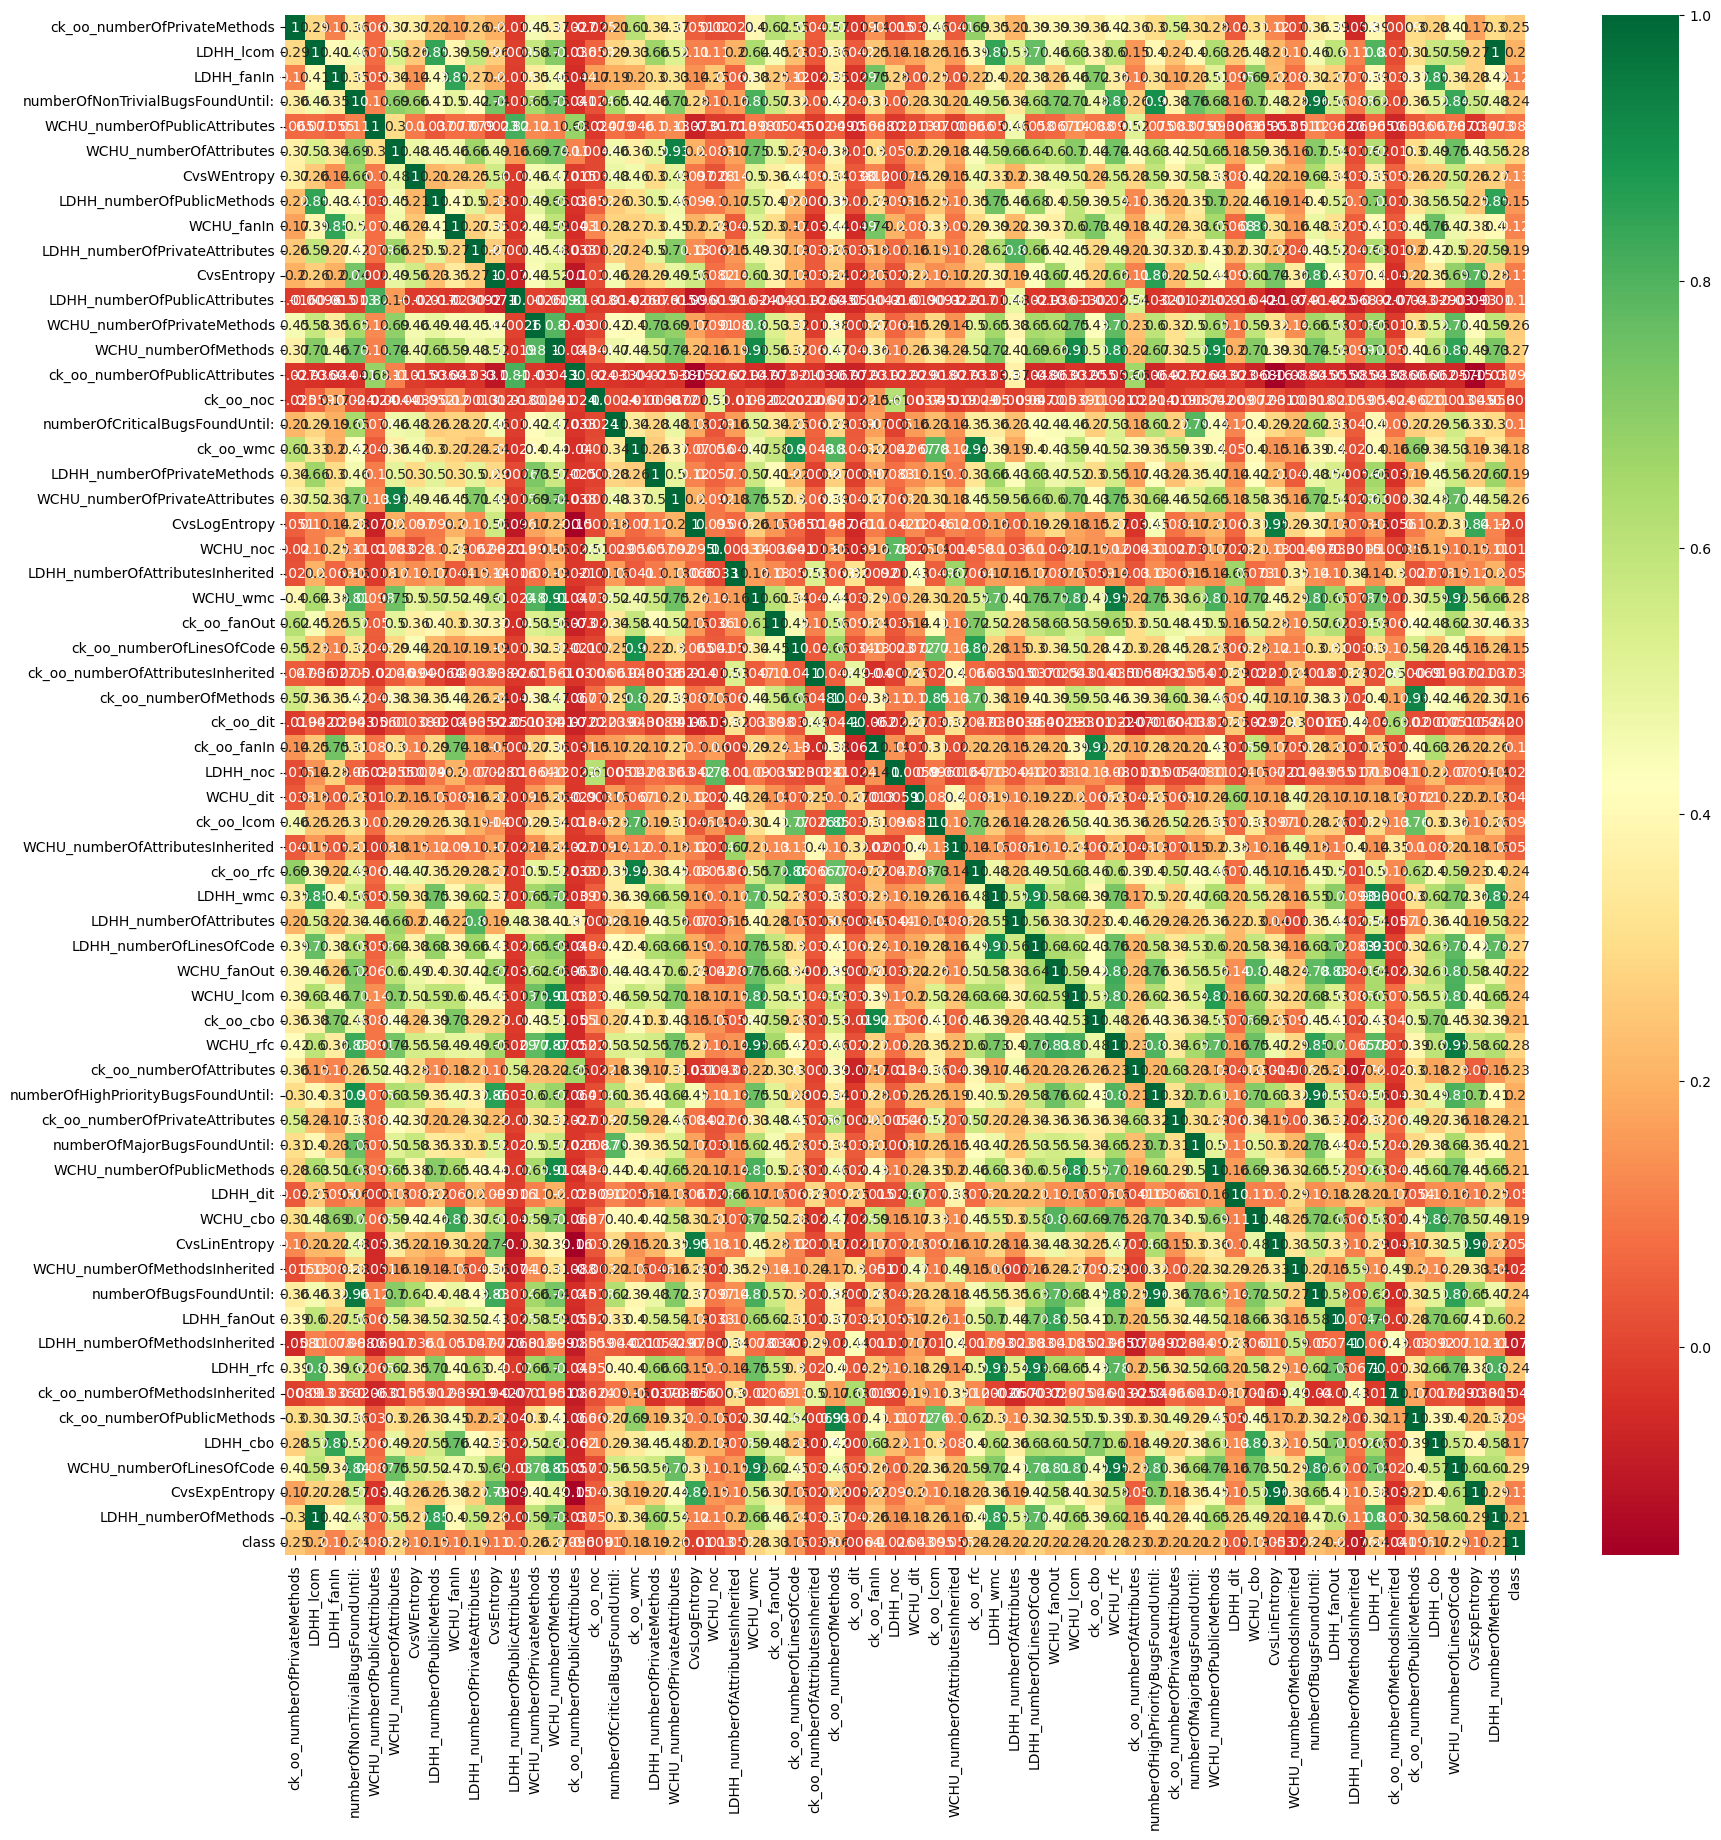

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

#get correlations of each features in dataset
corrmat = orig_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(orig_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.03497181 0.00828114 0.01502903 0.02891341 0.00394858 0.0160682
 0.01908634 0.00665546 0.01071848 0.01038324 0.01674798 0.00516445
 0.01243932 0.01334146 0.01218052 0.0077013  0.00503081 0.02370755
 0.00872615 0.01123532 0.01739549 0.00377463 0.00596931 0.01538908
 0.04323372 0.02802206 0.01345268 0.02207856 0.01400044 0.02181983
 0.00390158 0.00446364 0.01908032 0.00575015 0.02998385 0.01405686
 0.01463518 0.02477898 0.01391769 0.01086812 0.0298033  0.01723037
 0.03393858 0.02261319 0.02736287 0.01805181 0.01038451 0.0058308
 0.01391708 0.01999967 0.020807   0.02419456 0.01224304 0.01745676
 0.02169921 0.01917006 0.02096516 0.016002   0.02104199 0.01904841
 0.01133691]


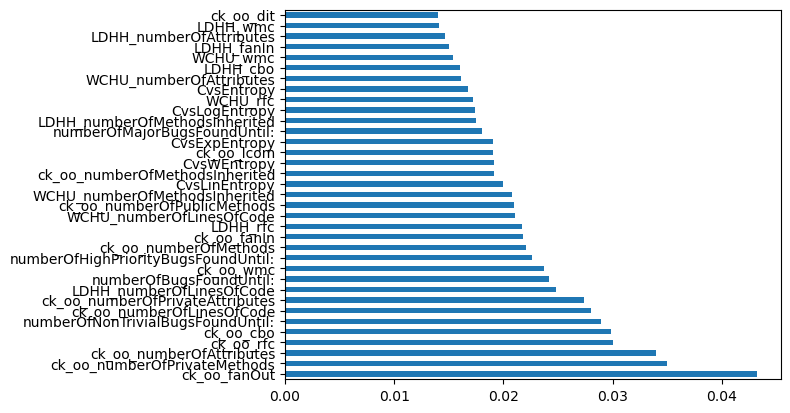

In [141]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

# 20 flod  for each one do 4 diffents parms

In [66]:
# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Assuming 'orig_df' is your dataset and it has features and a target column
# X = orig_df.drop('defects', axis=1)  # Features (drop the target column)
# y = orig_df['defects']               # Target column

# print(orig_df[X.columns].apply(pd.to_numeric, errors='coerce').isnull().sum())

# # Initialize KFold with 20 splits
# kf = KFold(n_splits=20, shuffle=True, random_state=42)


# # Lists to store the metrics for each fold
# accuracies = []
# precisions = []
# recalls = []
# f1_scores = []

# # To store results of each fold (optional)
# fold_num = 1
# # Define different gamma and C values for the RBF kernel (4 combinations)
# gamma_values = [0.1,]  # You can adjust these gamma values
# C_values = [ 1]       # You can adjust these C values

# # Loop through each fold
# for train_index, test_index in kf.split(X):
#     # Split data into train and test for this fold
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#     # Loop through the different kernel variations (RBF with different gamma and C)
#     for gamma, C in zip(gamma_values, C_values):
#         print(f"Fold {fold_num}, RBF Kernel with gamma={gamma} and C={C}:")
        
#         # Initialize the SVM model with RBF kernel and the current gamma, C values
#         clf = SVC(kernel='rbf', C=C, gamma=gamma)
        
#         # Train the model on the training data
#         clf.fit(X_train, y_train)

#         # Predict on the test data
#         y_pred = clf.predict(X_test)

#         # Calculate metrics
#         DT_accuracy = accuracy_score(y_test, y_pred)
#         DT_precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for imbalanced classes
#         DT_recall = recall_score(y_test, y_pred, average='weighted')
#         DT_f1 = f1_score(y_test, y_pred, average='weighted')

#         # Append metrics to lists
#         accuracies.append(DT_accuracy)
#         precisions.append(DT_precision)
#         recalls.append(DT_recall)
#         f1_scores.append(DT_f1)

#         # Print metrics for this kernel variation
#         print("Accuracy: {:.2f}".format(DT_accuracy))
#         print("Precision: {:.2f}".format(DT_precision))
#         print("Recall: {:.2f}".format(DT_recall))
#         print("F1 score: {:.2f}".format(DT_f1))
#         print("-" * 30)

#     fold_num += 1


SVM using 20 flods 

In [142]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'orig_df' is your dataset and it has features and a target column
X = orig_df.drop('bug', axis=1)  # Features (drop the target column)
y = orig_df['bug']               # Target column

print(orig_df[X.columns].apply(pd.to_numeric, errors='coerce').isnull().sum())

# Initialize KFold with 20 splits
kf = KFold(n_splits=10, shuffle=True, random_state=5)


# Lists to store the metrics for each fold


# To store results of each fold (optional)
fold_num = 1
# Define different gamma and C values for the RBF kernel (4 combinations)
gamma_values = [0.01, 0.1, 1, 10]  # You can adjust these gamma values
C_values = [0.1, 1, 10, 100]       # You can adjust these C values


    
# Loop through the different kernel variations (RBF with different gamma and C)
for gamma, C in zip(gamma_values, C_values):
    fold_num = 1
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
    # Split data into train and test for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the SVM model with RBF kernel and the current gamma, C values
        clf = SVC(kernel='rbf', C=C, gamma=gamma)
        
        # Train the model on the training data
        clf.fit(X_train, y_train)

        # Predict on the test data
        y_pred = clf.predict(X_test)

        # Calculate metrics
        DT_accuracy = accuracy_score(y_test, y_pred)
        DT_precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for imbalanced classes
        DT_recall = recall_score(y_test, y_pred, average='weighted')
        DT_f1 = f1_score(y_test, y_pred, average='weighted')

        # Append metrics to lists
        accuracies.append(DT_accuracy)
        precisions.append(DT_precision)
        recalls.append(DT_recall)
        f1_scores.append(DT_f1)

        # Print metrics for this kernel variation
        print("Accuracy: {:.2f}".format(DT_accuracy))
        print("Precision: {:.2f}".format(DT_precision))
        print("Recall: {:.2f}".format(DT_recall))
        print("F1 score: {:.2f}".format(DT_f1))
        print("-" * 30)
        fold_num += 1

    print(f"Fold {fold_num}, RBF Kernel with gamma={gamma} and C={C}:")
    # After all folds, calculate the mean and standard deviation of each metric
    mean_accuracy = np.mean(accuracies)
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_f1 = np.mean(f1_scores)

    std_accuracy = np.std(accuracies)
    std_precision = np.std(precisions)
    std_recall = np.std(recalls)
    std_f1 = np.std(f1_scores)

    # Print the compiled results
    print("Mean Accuracy: {:.2f} ± {:.2f}".format(mean_accuracy, std_accuracy))
    print("Mean Precision: {:.2f} ± {:.2f}".format(mean_precision, std_precision))
    print("Mean Recall: {:.2f} ± {:.2f}".format(mean_recall, std_recall))
    print("Mean F1 Score: {:.2f} ± {:.2f}".format(mean_f1, std_f1))



ck_oo_numberOfPrivateMethods         0
LDHH_lcom                            0
LDHH_fanIn                           0
numberOfNonTrivialBugsFoundUntil:    0
WCHU_numberOfPublicAttributes        0
                                    ..
ck_oo_numberOfPublicMethods          0
LDHH_cbo                             0
WCHU_numberOfLinesOfCode             0
CvsExpEntropy                        0
LDHH_numberOfMethods                 0
Length: 61, dtype: int64
Accuracy: 0.86
Precision: 0.73
Recall: 0.86
F1 score: 0.79
------------------------------


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.92
Precision: 0.85
Recall: 0.92
F1 score: 0.88
------------------------------
Accuracy: 0.88
Precision: 0.77
Recall: 0.88
F1 score: 0.82
------------------------------
Accuracy: 0.85
Precision: 0.72
Recall: 0.85
F1 score: 0.78
------------------------------


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.90
Precision: 0.82
Recall: 0.90
F1 score: 0.86
------------------------------
Accuracy: 0.85
Precision: 0.73
Recall: 0.85
F1 score: 0.79
------------------------------
Accuracy: 0.88
Precision: 0.78
Recall: 0.88
F1 score: 0.83
------------------------------


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.84
Precision: 0.70
Recall: 0.84
F1 score: 0.77
------------------------------
Accuracy: 0.84
Precision: 0.70
Recall: 0.84
F1 score: 0.77
------------------------------
Accuracy: 0.87
Precision: 0.75
Recall: 0.87
F1 score: 0.80
------------------------------
Fold 11, RBF Kernel with gamma=0.01 and C=0.1:
Mean Accuracy: 0.87 ± 0.03
Mean Precision: 0.75 ± 0.04
Mean Recall: 0.87 ± 0.03
Mean F1 Score: 0.81 ± 0.04


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1 score: 0.81
------------------------------
Accuracy: 0.92
Precision: 0.89
Recall: 0.92
F1 score: 0.89
------------------------------
Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1 score: 0.84
------------------------------
Accuracy: 0.85
Precision: 0.80
Recall: 0.85
F1 score: 0.79
------------------------------
Accuracy: 0.89
Precision: 0.81
Recall: 0.89
F1 score: 0.85
------------------------------
Accuracy: 0.85
Precision: 0.81
Recall: 0.85
F1 score: 0.80
------------------------------
Accuracy: 0.88
Precision: 0.84
Recall: 0.88
F1 score: 0.84
------------------------------
Accuracy: 0.84
Precision: 0.79
Recall: 0.84
F1 score: 0.78
------------------------------
Accuracy: 0.85
Precision: 0.87
Recall: 0.85
F1 score: 0.79
------------------------------
Accuracy: 0.87
Precision: 0.82
Recall: 0.87
F1 score: 0.81
------------------------------
Fold 11, RBF Kernel with gamma=0.1 and C=1:
Mean Accuracy: 0.87 ± 0.02
Mean Precision: 0.84 ± 0.04
M

/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.86
Precision: 0.73
Recall: 0.86
F1 score: 0.79
------------------------------
Accuracy: 0.92
Precision: 0.89
Recall: 0.92
F1 score: 0.89
------------------------------
Accuracy: 0.88
Precision: 0.90
Recall: 0.88
F1 score: 0.83
------------------------------
Accuracy: 0.85
Precision: 0.72
Recall: 0.85
F1 score: 0.78
------------------------------


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.90
Precision: 0.82
Recall: 0.90
F1 score: 0.85
------------------------------
Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1 score: 0.81
------------------------------
Accuracy: 0.88
Precision: 0.82
Recall: 0.88
F1 score: 0.83
------------------------------
Accuracy: 0.85
Precision: 0.88
Recall: 0.85
F1 score: 0.80
------------------------------
Accuracy: 0.84
Precision: 0.87
Recall: 0.84
F1 score: 0.78
------------------------------
Accuracy: 0.87
Precision: 0.75
Recall: 0.87
F1 score: 0.80
------------------------------
Fold 11, RBF Kernel with gamma=1 and C=10:
Mean Accuracy: 0.87 ± 0.02
Mean Precision: 0.83 ± 0.07
Mean Recall: 0.87 ± 0.02
Mean F1 Score: 0.82 ± 0.03


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.86
Precision: 0.73
Recall: 0.86
F1 score: 0.79
------------------------------
Accuracy: 0.92
Precision: 0.89
Recall: 0.92
F1 score: 0.89
------------------------------
Accuracy: 0.88
Precision: 0.90
Recall: 0.88
F1 score: 0.83
------------------------------


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.85
Precision: 0.72
Recall: 0.85
F1 score: 0.78
------------------------------
Accuracy: 0.90
Precision: 0.82
Recall: 0.90
F1 score: 0.85
------------------------------
Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1 score: 0.81
------------------------------
Accuracy: 0.88
Precision: 0.82
Recall: 0.88
F1 score: 0.83
------------------------------
Accuracy: 0.85
Precision: 0.88
Recall: 0.85
F1 score: 0.80
------------------------------
Accuracy: 0.84
Precision: 0.87
Recall: 0.84
F1 score: 0.78
------------------------------
Accuracy: 0.87
Precision: 0.75
Recall: 0.87
F1 score: 0.80
------------------------------
Fold 11, RBF Kernel with gamma=10 and C=100:
Mean Accuracy: 0.87 ± 0.02
Mean Precision: 0.83 ± 0.07
Mean Recall: 0.87 ± 0.02
Mean F1 Score: 0.82 ± 0.03


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [143]:
# After all folds, calculate the mean and standard deviation of each metric
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

std_accuracy = np.std(accuracies)
std_precision = np.std(precisions)
std_recall = np.std(recalls)
std_f1 = np.std(f1_scores)

# Print the compiled results
print("Mean Accuracy: {:.2f} ± {:.2f}".format(mean_accuracy, std_accuracy))
print("Mean Precision: {:.2f} ± {:.2f}".format(mean_precision, std_precision))
print("Mean Recall: {:.2f} ± {:.2f}".format(mean_recall, std_recall))
print("Mean F1 Score: {:.2f} ± {:.2f}".format(mean_f1, std_f1))

Mean Accuracy: 0.87 ± 0.02
Mean Precision: 0.83 ± 0.07
Mean Recall: 0.87 ± 0.02
Mean F1 Score: 0.82 ± 0.03


svm using 10 flods with feature selection using RandomForestClassifier

In [36]:
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.feature_selection import SelectFromModel
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import KFold, GridSearchCV

# # Assuming 'orig_df' is your dataset with features and target column
# X = orig_df.drop('defects', axis=1)  # Features (drop the target column)
# y = orig_df['defects']               # Target column

# # Initialize KFold with 10 splits
# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# # Lists to store the metrics for each fold
# accuracies = []
# precisions = []
# recalls = []
# f1_scores = []

# # Define different thresholds to try for feature selection (SelectFromModel)
# thresholds = [None, 'mean', 'median', 0.01, 0.02]  # You can adjust these thresholds

# # Define a grid for parameter search, including SVM hyperparameters
# param_grid = {
#     'threshold': thresholds,          # Feature selection thresholds
#     'C': [0.1, 1, 10],                # SVM C values
#     'gamma': [0.01, 0.1, 1]           # SVM gamma values
# }

# # Loop through each fold in KFold
# fold_num = 1
# for train_index, test_index in kf.split(X):
#     # Split data into train and test for this fold
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#     # Initialize RandomForest for feature selection
#     rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
    
#     # Use GridSearchCV to find the best threshold and SVM parameters
#     best_accuracy = 0
#     best_threshold = None
#     best_clf = None

#     for threshold in thresholds:
#         # Perform feature selection with SelectFromModel using the current threshold
#         print(threshold)
#         selector = SelectFromModel(rf_selector, threshold=threshold)
#         selector.fit(X_train, y_train)
        
#         # Get the selected features
#         X_train_selected = selector.transform(X_train)
#         print(X_train_selected)
#         X_test_selected = selector.transform(X_test)
        
#         # Initialize the SVM model
#         clf = SVC(kernel='rbf', C=1.0, gamma=0.1)  # Adjust 'C' and 'gamma' as needed

#         # Train the SVM model on the selected features
#         clf.fit(X_train_selected, y_train)

#         # Predict on the test data with selected features
#         y_pred = clf.predict(X_test_selected)

#         # Calculate metrics
#         DT_accuracy = accuracy_score(y_test, y_pred)
#         DT_precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for imbalanced classes
#         DT_recall = recall_score(y_test, y_pred, average='weighted')
#         DT_f1 = f1_score(y_test, y_pred, average='weighted')
        
#         # If the accuracy improves, store the results
#         if DT_accuracy > best_accuracy:
#             best_accuracy = DT_accuracy
#             best_threshold = threshold
#             best_clf = clf
    
#     # Append the best results of this fold to the lists
#     accuracies.append(best_accuracy)
#     precisions.append(DT_precision)
#     recalls.append(DT_recall)
#     f1_scores.append(DT_f1)

#     # Print the best metrics for this fold
#     print(f"Fold {fold_num}, Best Threshold: {best_threshold}")
#     print("Best Accuracy: {:.2f}".format(best_accuracy))
#     print("Precision: {:.2f}".format(DT_precision))
#     print("Recall: {:.2f}".format(DT_recall))
#     print("F1 score: {:.2f}".format(DT_f1))
#     print("-" * 30)

#     fold_num += 1

# # Print the average performance across all folds
# print(f"Average Accuracy: {np.mean(accuracies):.2f}")
# print(f"Average Precision: {np.mean(precisions):.2f}")
# print(f"Average Recall: {np.mean(recalls):.2f}")
# print(f"Average F1 Score: {np.mean(f1_scores):.2f}")


# Apply SMOTE to the training data / very bad results 



In [37]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_selected, y_train)

# Train the model on resampled data
clf.fit(X_train_resampled, y_train_resampled)

Selected features with importance >= 0.15: ['ck_oo_numberOfPrivateMethods', 'numberOfNonTrivialBugsFoundUntil:', 'ck_oo_fanOut', 'ck_oo_numberOfLinesOfCode', 'ck_oo_rfc', 'ck_oo_cbo', 'ck_oo_numberOfAttributes', 'ck_oo_numberOfPrivateAttributes']


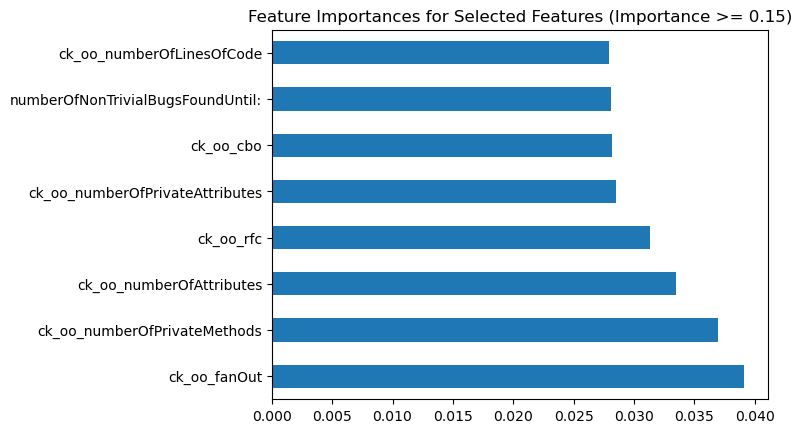

Fold 1, Accuracy: 0.87
Precision: 0.77
Recall: 0.87
F1 score: 0.82
------------------------------
Selected features with importance >= 0.15: ['ck_oo_numberOfPrivateMethods', 'numberOfNonTrivialBugsFoundUntil:', 'ck_oo_fanOut', 'ck_oo_numberOfLinesOfCode', 'ck_oo_rfc', 'ck_oo_cbo', 'ck_oo_numberOfAttributes', 'ck_oo_numberOfPrivateAttributes']


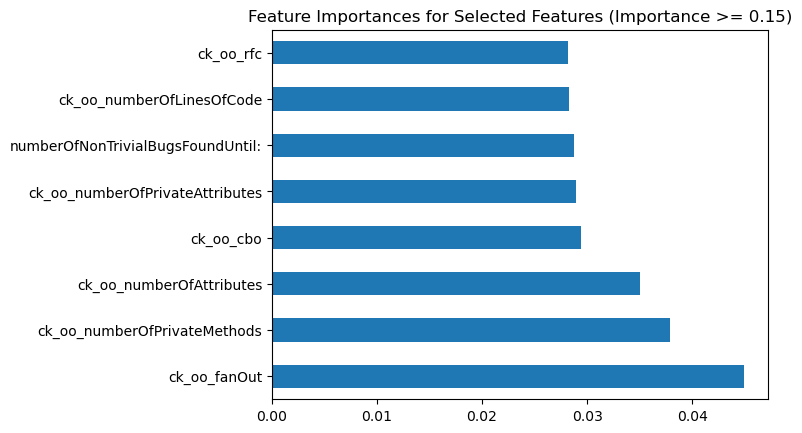

Fold 2, Accuracy: 0.86
Precision: 0.74
Recall: 0.86
F1 score: 0.80
------------------------------


/home/akurdi/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Selected features with importance >= 0.15: ['ck_oo_numberOfPrivateMethods', 'numberOfNonTrivialBugsFoundUntil:', 'ck_oo_fanOut', 'ck_oo_numberOfLinesOfCode', 'ck_oo_rfc', 'LDHH_numberOfLinesOfCode', 'ck_oo_cbo', 'ck_oo_numberOfAttributes', 'ck_oo_numberOfPrivateAttributes']


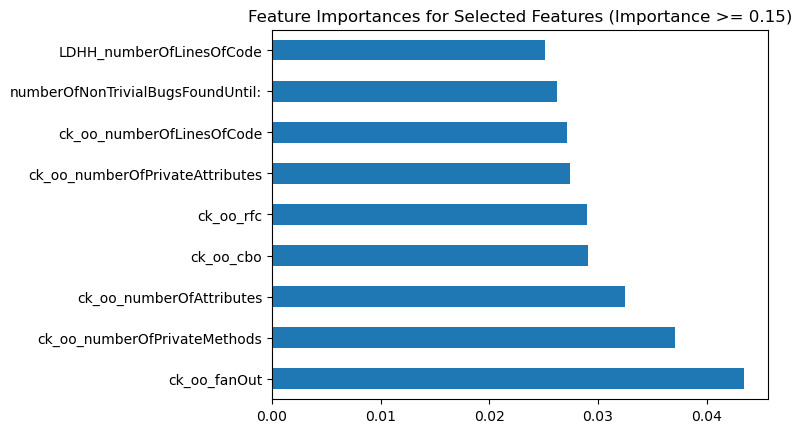

Fold 3, Accuracy: 0.85
Precision: 0.74
Recall: 0.85
F1 score: 0.79
------------------------------
Selected features with importance >= 0.15: ['ck_oo_numberOfPrivateMethods', 'numberOfNonTrivialBugsFoundUntil:', 'ck_oo_fanOut', 'ck_oo_numberOfLinesOfCode', 'ck_oo_rfc', 'ck_oo_cbo', 'ck_oo_numberOfAttributes', 'ck_oo_numberOfPrivateAttributes']


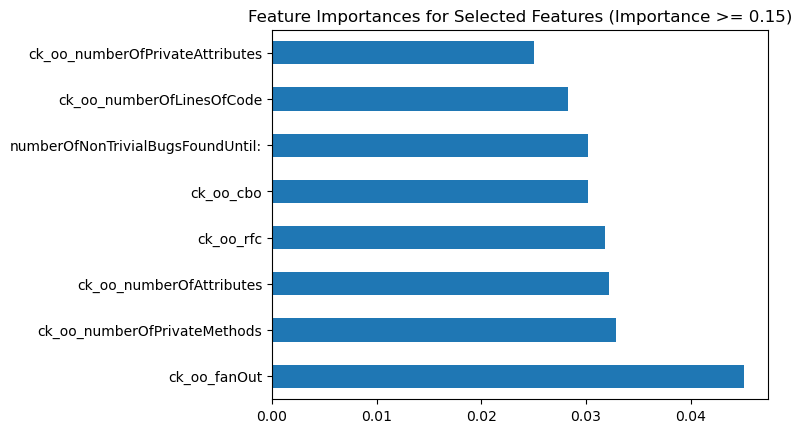

Fold 4, Accuracy: 0.88
Precision: 0.78
Recall: 0.88
F1 score: 0.82
------------------------------
Selected features with importance >= 0.15: ['ck_oo_numberOfPrivateMethods', 'numberOfNonTrivialBugsFoundUntil:', 'ck_oo_fanOut', 'ck_oo_numberOfLinesOfCode', 'ck_oo_rfc', 'ck_oo_cbo', 'ck_oo_numberOfAttributes', 'ck_oo_numberOfPrivateAttributes']


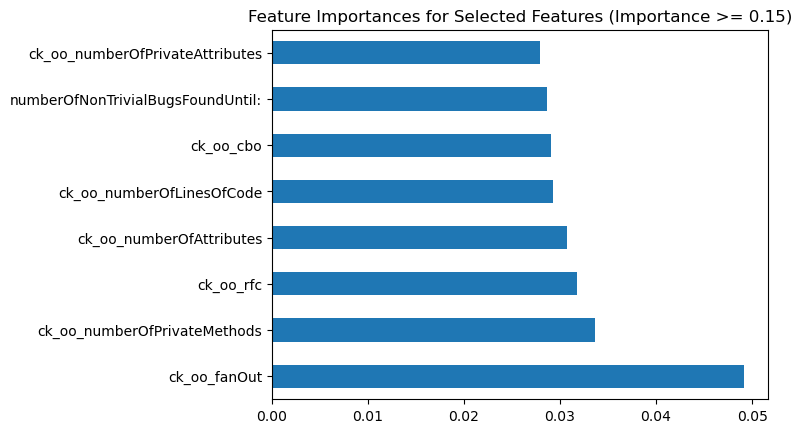

Fold 5, Accuracy: 0.88
Precision: 0.78
Recall: 0.88
F1 score: 0.82
------------------------------
Selected features with importance >= 0.15: ['ck_oo_numberOfPrivateMethods', 'numberOfNonTrivialBugsFoundUntil:', 'ck_oo_wmc', 'ck_oo_fanOut', 'ck_oo_numberOfLinesOfCode', 'ck_oo_rfc', 'ck_oo_cbo', 'ck_oo_numberOfAttributes', 'ck_oo_numberOfPrivateAttributes']


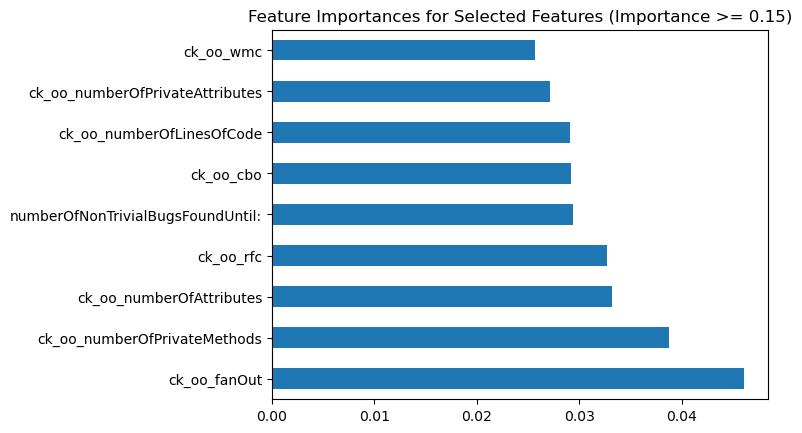

Fold 6, Accuracy: 0.88
Precision: 0.83
Recall: 0.88
F1 score: 0.84
------------------------------
Selected features with importance >= 0.15: ['ck_oo_numberOfPrivateMethods', 'numberOfNonTrivialBugsFoundUntil:', 'ck_oo_fanOut', 'ck_oo_numberOfLinesOfCode', 'ck_oo_rfc', 'ck_oo_cbo', 'ck_oo_numberOfAttributes', 'ck_oo_numberOfPrivateAttributes']


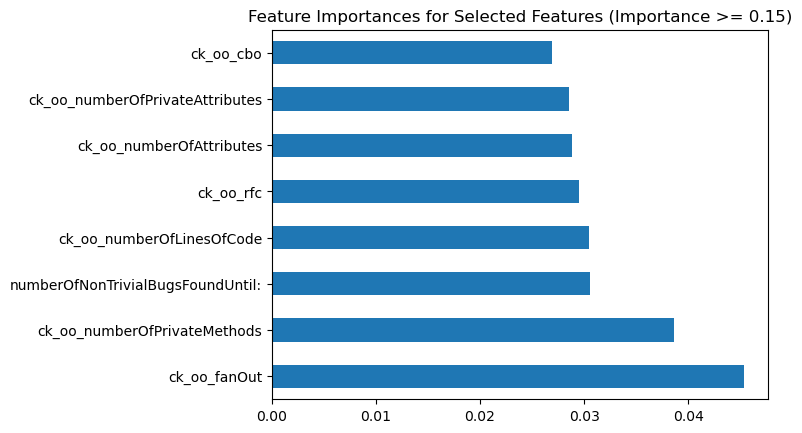

Fold 7, Accuracy: 0.85
Precision: 0.81
Recall: 0.85
F1 score: 0.80
------------------------------
Selected features with importance >= 0.15: ['ck_oo_numberOfPrivateMethods', 'numberOfNonTrivialBugsFoundUntil:', 'ck_oo_fanOut', 'ck_oo_numberOfLinesOfCode', 'ck_oo_rfc', 'LDHH_numberOfLinesOfCode', 'ck_oo_cbo', 'ck_oo_numberOfAttributes', 'ck_oo_numberOfPrivateAttributes']


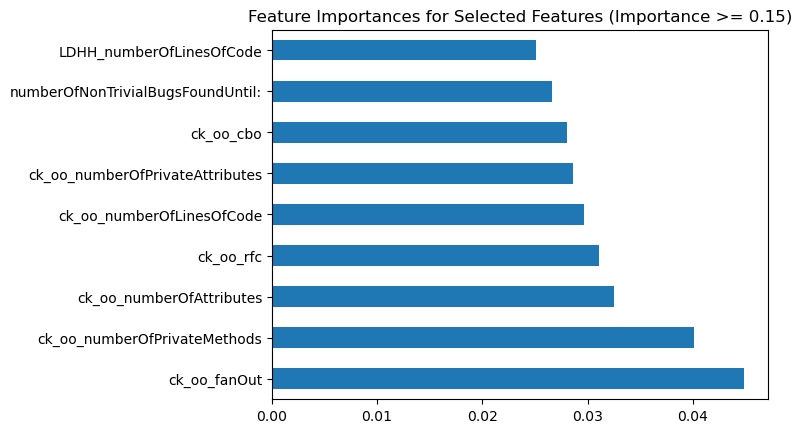

Fold 8, Accuracy: 0.88
Precision: 0.85
Recall: 0.88
F1 score: 0.83
------------------------------
Selected features with importance >= 0.15: ['ck_oo_numberOfPrivateMethods', 'numberOfNonTrivialBugsFoundUntil:', 'ck_oo_fanOut', 'ck_oo_numberOfLinesOfCode', 'ck_oo_rfc', 'ck_oo_cbo', 'ck_oo_numberOfAttributes', 'ck_oo_numberOfPrivateAttributes']


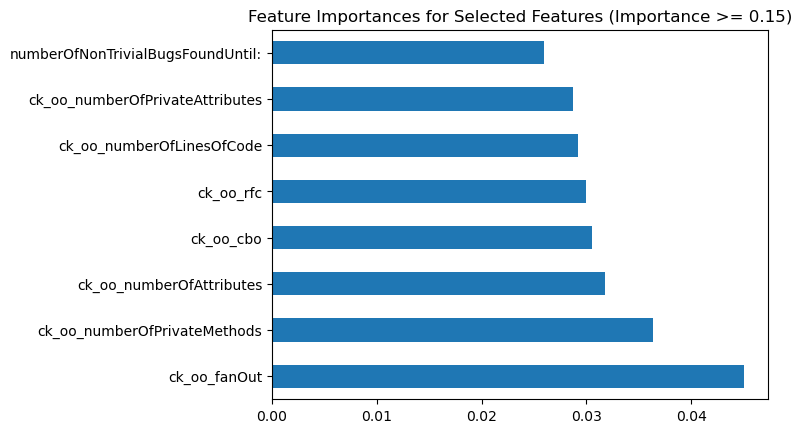

Fold 9, Accuracy: 0.85
Precision: 0.83
Recall: 0.85
F1 score: 0.80
------------------------------
Selected features with importance >= 0.15: ['ck_oo_numberOfPrivateMethods', 'numberOfNonTrivialBugsFoundUntil:', 'ck_oo_fanOut', 'ck_oo_numberOfLinesOfCode', 'ck_oo_rfc', 'ck_oo_cbo', 'ck_oo_numberOfAttributes', 'ck_oo_numberOfPrivateAttributes']


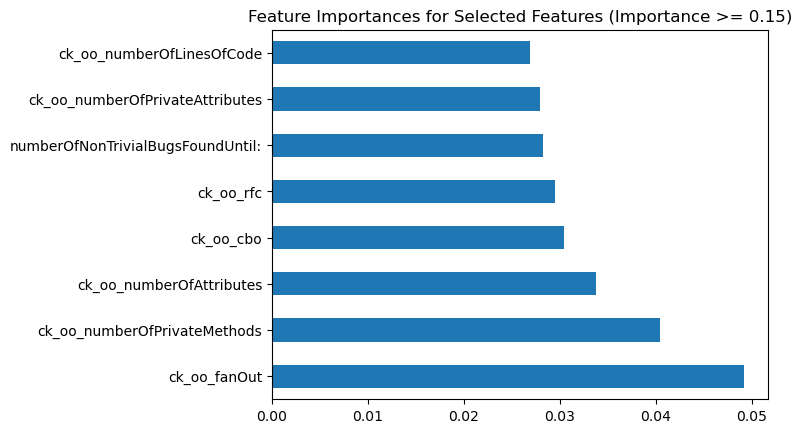

Fold 10, Accuracy: 0.87
Precision: 0.82
Recall: 0.87
F1 score: 0.81
------------------------------
Average Accuracy: 0.87
Average Precision: 0.79
Average Recall: 0.87
Average F1 Score: 0.81


In [148]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


# Assuming 'orig_df' is your dataset with features and target column
X = orig_df.drop('class', axis=1)  # Features (drop the target column)
y = orig_df['class']               # Target column

# Initialize KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store the metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through each fold in KFold
fold_num = 1
for train_index, test_index in kf.split(X):
    # Split data into train and test for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize ExtraTreesClassifier for feature selection
    model = ExtraTreesClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Use feature importances to filter features with importance score >= 0.15
    feature_importances = model.feature_importances_
    selected_features = X_train.columns[feature_importances >= 0.0]
    print(f"Selected features with importance >= 0.15: {list(selected_features)}")

    # Transform the train and test sets to only include the selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Plot graph of feature importances only for selected features
    selected_feat_importances = pd.Series(feature_importances, index=X_train.columns)[selected_features]
    selected_feat_importances.sort_values(ascending=False).plot(kind='barh')
    plt.title("Feature Importances for Selected Features (Importance >= 0.15)")
    plt.show()

    # Initialize the SVM model
    clf = SVC(kernel='rbf', C=1.0, gamma=0.1)  # Adjust 'C' and 'gamma' as needed

    # Train the SVM model on the selected features
    clf.fit(X_train_selected, y_train)

    # Predict on the test data with selected features
    y_pred = clf.predict(X_test_selected)

    # Calculate metrics
    DT_accuracy = accuracy_score(y_test, y_pred)
    DT_precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for imbalanced classes
    DT_recall = recall_score(y_test, y_pred, average='weighted')
    DT_f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the results of this fold to the lists
    accuracies.append(DT_accuracy)
    precisions.append(DT_precision)
    recalls.append(DT_recall)
    f1_scores.append(DT_f1)

    # Print the metrics for this fold
    print(f"Fold {fold_num}, Accuracy: {DT_accuracy:.2f}")
    print("Precision: {:.2f}".format(DT_precision))
    print("Recall: {:.2f}".format(DT_recall))
    print("F1 score: {:.2f}".format(DT_f1))
    print("-" * 30)

    fold_num += 1

# Print the average performance across all folds
print(f"Average Accuracy: {np.mean(accuracies):.2f}")
print(f"Average Precision: {np.mean(precisions):.2f}")
print(f"Average Recall: {np.mean(recalls):.2f}")
print(f"Average F1 Score: {np.mean(f1_scores):.2f}")
